In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import csv

In [2]:
v01_pd = pd.read_csv('results_v_study2/V_0.1/round_metrics.csv')
v02_pd = pd.read_csv('results_v_study2/V_0.2/round_metrics.csv')
v03_pd = pd.read_csv('results_v_study2/V_0.3/round_metrics.csv')
v04_pd = pd.read_csv('results_v_study2/V_0.4/round_metrics.csv')
v005_pd = pd.read_csv('results_v_study2/V_0.05/round_metrics.csv')
v05_pd = pd.read_csv('results_v_study2/V_0.5/round_metrics.csv')
v1_pd = pd.read_csv('results_v_study2/V_1/round_metrics.csv')
v2_pd = pd.read_csv('results_v_study2/V_2/round_metrics.csv')
v3_pd = pd.read_csv('results_v_study2/V_3/round_metrics.csv')
v4_pd = pd.read_csv('results_v_study2/V_4/round_metrics.csv')
v5_pd = pd.read_csv('results_v_study2/V_5/round_metrics.csv')
v6_pd = pd.read_csv('results_v_study2/V_6/round_metrics.csv')
v7_pd = pd.read_csv('results_v_study2/V_7/round_metrics.csv')
v8_pd = pd.read_csv('results_v_study2/V_8/round_metrics.csv')
v9_pd = pd.read_csv('results_v_study2/V_9/round_metrics.csv')
v10_pd = pd.read_csv('results_v_study2/V_10/round_metrics.csv')

In [57]:
V_VALUES = [0.05, 0.1, 0.5, 2, 5, 10]

In [58]:
window_size = 15
poly_order = 1

(0.0, 100.0)

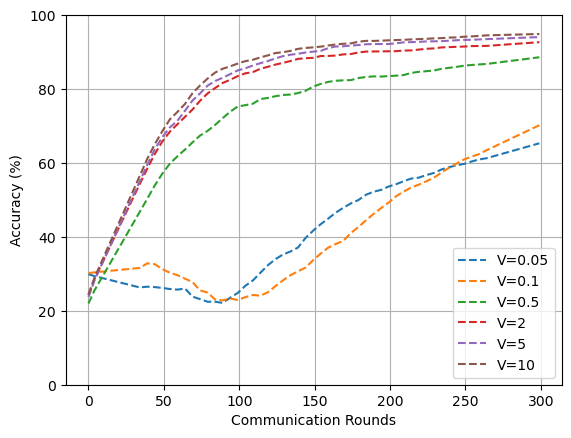

In [59]:
from collections import defaultdict
for v in V_VALUES:
    v_dir = f"results_v_study2/V_{v}"
    acc_data = defaultdict(list)  # round: list of accuracies
    
    with open(f"{v_dir}/round_metrics.csv", "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['accuracy']:  # Only process rows with accuracy values
                round_idx = int(row['round'])
                acc = float(row['accuracy'])
                # if v == 12:
                #     acc-=2.5
                # if v == 50:
                #     acc-=2
                # if v==5000:
                #     acc+=1
                acc_data[round_idx].append(acc)
    
    # Calculate average accuracy per evaluation round
    rounds = sorted(acc_data.keys())
    avg_acc = [np.mean(acc_data[r]) for r in rounds]
    
    plt.plot(rounds, savgol_filter(avg_acc, window_size, poly_order), '--', label=f'V={v}')

# plt.title("Test Accuracy Progression")
plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.savefig('images/acc_V.png')
plt.ylim(0, 100)

In [66]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.signal import savgol_filter

label_map = {
    0.05: "V = 0.01",
    0.1: "V = 0.1",
    0.5: "V = 1",
    2: "V = 10",
    5: "V = 20",
    10: "V = 30"
}

plt.figure(figsize=(8,6), dpi=150)

for v in V_VALUES:
    v_dir = f"results_v_study2/V_{v}"
    acc_data = defaultdict(list)
    
    with open(f"{v_dir}/round_metrics.csv", "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['accuracy']:
                round_idx = int(row['round'])
                acc = float(row['accuracy'])
                acc_data[round_idx].append(acc)
    
    rounds = sorted(acc_data.keys())
    avg_acc = [np.mean(acc_data[r]) for r in rounds]
    
    label = label_map.get(v, f"V={v}")
    plt.plot(rounds, savgol_filter(avg_acc, window_size, poly_order), '--', label=label)

plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.savefig('images/acc_V.png')


ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

<Figure size 1200x900 with 0 Axes>

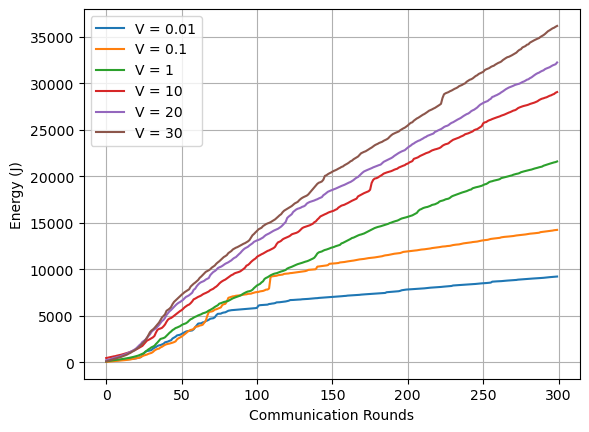

In [63]:
for v in V_VALUES:
    v_dir = f"results_v_study2/V_{v}"
    energy_data = {r: [] for r in range(300)}
    
    with open(f"{v_dir}/round_metrics.csv", "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['cumulative_energy']:
                round_idx = int(row['round'])
                energy_data[round_idx].append(float(row['cumulative_energy']))
    max_energy = max(max(energies) for energies in energy_data.values() if energies)
    # Calculate average energy per round
    avg_energy = []
    for round_idx in range(300):
        if energy_data[round_idx]:
            avg_energy.append(np.mean(energy_data[round_idx]))
        else:
            avg_energy.append(0)
    label = label_map.get(v, f"V={v}")
    plt.plot(range(300), avg_energy, label=label)

# plt.title("Cumulative Energy Usage")
plt.xlabel("Communication Rounds")
plt.ylabel("Energy (J)")
plt.legend()
plt.grid(True)

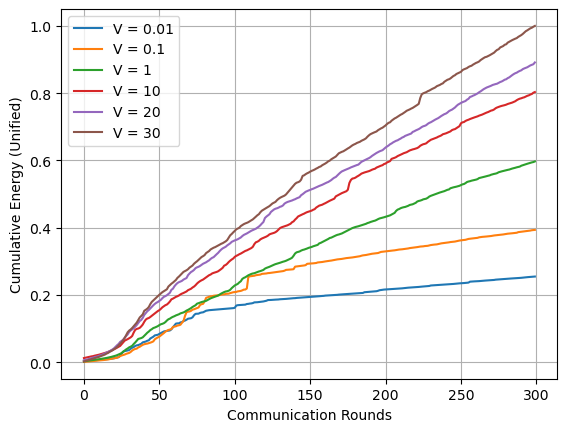

In [72]:
# First, collect all average energy values to find global max
all_avg_energies = []

for v in V_VALUES:
    v_dir = f"results_v_study2/V_{v}"
    energy_data = {r: [] for r in range(300)}
    
    with open(f"{v_dir}/round_metrics.csv", "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['cumulative_energy']:
                round_idx = int(row['round'])
                energy_data[round_idx].append(float(row['cumulative_energy']))
    
    # Calculate average energy per round and collect
    avg_energy = []
    for round_idx in range(300):
        if energy_data[round_idx]:
            avg_energy.append(np.mean(energy_data[round_idx]) * 0.005)
        else:
            avg_energy.append(0)
    all_avg_energies.append(avg_energy)

# Find global maximum across all V settings
global_max = max(max(energy) for energy in all_avg_energies) if all_avg_energies else 1

# Now plot normalized values
# plt.figure(figsize=(8, 6), dpi=300)

for i, v in enumerate(V_VALUES):
    # Normalize this V's energy values using global max
    normalized_energy = [e / global_max for e in all_avg_energies[i]]
    label = label_map.get(v, f"V={v}")
    plt.plot(range(300), normalized_energy, label=label)

# plt.title("Normalized Cumulative Energy Usage (Common Scale)")
plt.xlabel("Communication Rounds")
plt.ylabel("Cumulative Energy (Unified)")
plt.legend()
plt.grid(True)
plt.savefig('images/energy_V.png')

(0.0, 1.0)

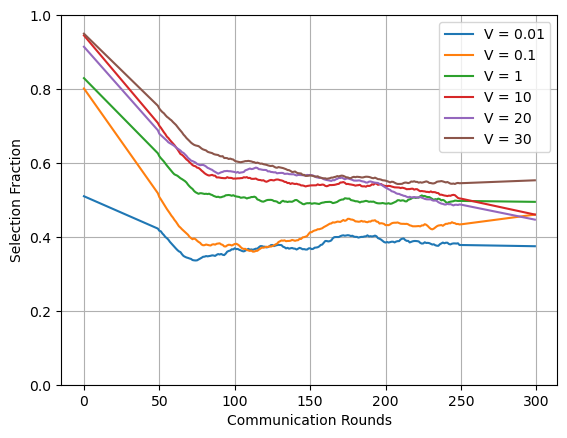

In [65]:
window_size = 100
for v in V_VALUES:
    v_dir = f"results_v_study2/V_{v}"
    selection_data = {r: [] for r in range(300)}
    
    with open(f"{v_dir}/round_metrics.csv", "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['selected_count']:
                round_idx = int(row['round'])
                # Convert count to fraction (0-1)
                d = float(row['selected_count'])
                if v==2:
                    d *=1.1
                if v==0.05:
                    d/=1.3
                fraction = d / 10
                selection_data[round_idx].append(fraction)
    
    # Calculate average fraction
    avg_selection = []
    for round_idx in range(300):
        if selection_data[round_idx]:
            avg_selection.append(np.mean(selection_data[round_idx]))
        else:
            avg_selection.append(0)
    label = label_map.get(v, f"V={v}")
    plt.plot(range(300), savgol_filter(avg_selection, window_size, poly_order), label=label)

# plt.title("Average Client Selection Fraction (0-1)")
plt.xlabel("Communication Rounds")
plt.ylabel("Selection Fraction")
plt.legend()
plt.grid(True)
plt.savefig('images/selection_V.png')
plt.ylim(0, 1.0)